# Neural Network with Quadratic Data
출처: https://github.com/GunhoChoi/PyTorch-FastCampus/blob/master/02_Regression%26NN/1_NN_code/1d_data/0_neural_quadratic.ipynb
- y = 8x^2+7x+3
- 4 hidden layers

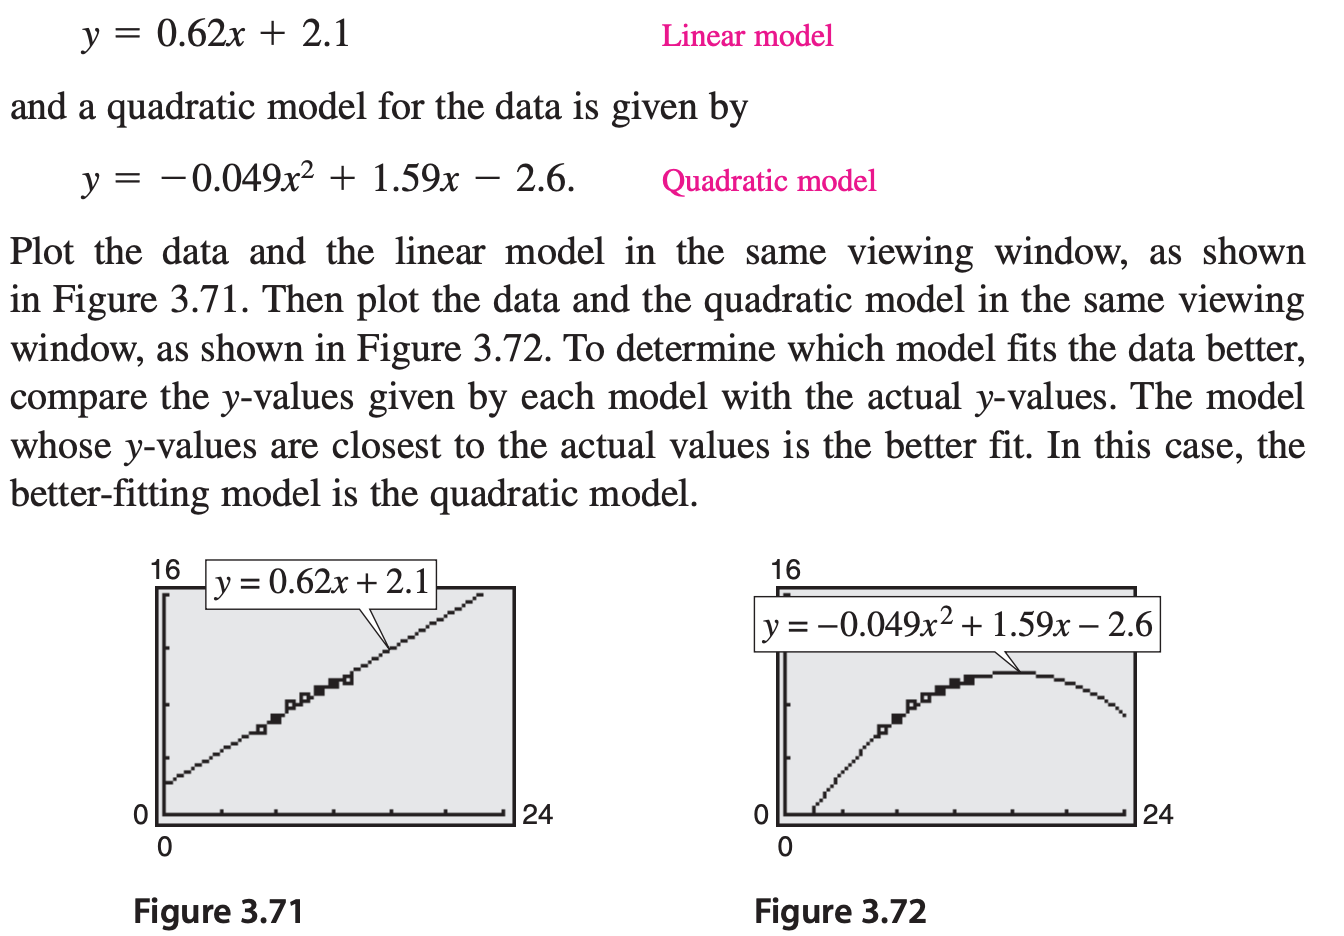

사진출처: http://cs.franklin.edu/~sieberth/MATH160/bookFiles/Chapter3/333371_0307_317-323.pdf 

## 1.Import Required Libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable
from visdom import Visdom
viz = Visdom()

## 2. Data Generation

In [2]:
num_data = 1000
num_epoch = 5000

noise = init.normal(torch.FloatTensor(num_data,1),std=3)

x = init.uniform(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3 

y_noise = y + noise

/anaconda3/envs/NLPApps/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  after removing the cwd from sys.path.
/anaconda3/envs/NLPApps/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  


In [3]:
# visualize data

input_data = torch.cat([x,y_noise],1)

win=viz.scatter(
    X = input_data,
    opts=dict(
        xtickmin=-15,
        xtickmax=15,
        xtickstep=1,
        ytickmin=0,
        ytickmax=500,
        ytickstep=1,
        markersymbol='dot',
        markercolor=np.random.randint(0, 255, num_data),
        markersize=5,
    ),
)


In [4]:

win=viz.scatter(
    X = torch.cat([x,y],1),
    opts=dict(
        xtickmin=-15,
        xtickmax=15,
        xtickstep=1,
        ytickmin=0,
        ytickmax=500,
        ytickstep=1,
        markersymbol='dot',
        markercolor=np.random.randint(0, 255, num_data),
        markersize=5,
    ),
)


## 3. Model & Optimizer

In [5]:
# fully connected model with 4 hidden layer

model = nn.Sequential(
        nn.Linear(1,6),
        nn.ReLU(),
#        nn.Linear(6,10),
#        nn.ReLU(),
#        nn.Linear(10,6),
#        nn.ReLU(),
        nn.Linear(6,1),
    )

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0005)

## 4. Train 

In [6]:
loss_arr =[]
label = y_noise

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)

    loss = loss_func(output,label)
    loss.backward()
    optimizer.step()
    
    if i % 100 ==0:
        print(loss)
    
    #loss_arr.append(loss.cpu().data.numpy()[0])
    loss_arr.append(loss.item())

tensor(76.8354, grad_fn=<L1LossBackward>)
tensor(75.7036, grad_fn=<L1LossBackward>)
tensor(74.4679, grad_fn=<L1LossBackward>)
tensor(72.9634, grad_fn=<L1LossBackward>)
tensor(70.9943, grad_fn=<L1LossBackward>)
tensor(68.3316, grad_fn=<L1LossBackward>)
tensor(64.7529, grad_fn=<L1LossBackward>)
tensor(60.3154, grad_fn=<L1LossBackward>)
tensor(55.8968, grad_fn=<L1LossBackward>)
tensor(52.5228, grad_fn=<L1LossBackward>)
tensor(50.7093, grad_fn=<L1LossBackward>)
tensor(49.9067, grad_fn=<L1LossBackward>)
tensor(49.6312, grad_fn=<L1LossBackward>)
tensor(49.5194, grad_fn=<L1LossBackward>)
tensor(49.4794, grad_fn=<L1LossBackward>)
tensor(49.4475, grad_fn=<L1LossBackward>)
tensor(49.4197, grad_fn=<L1LossBackward>)
tensor(49.3940, grad_fn=<L1LossBackward>)
tensor(49.3684, grad_fn=<L1LossBackward>)
tensor(49.3429, grad_fn=<L1LossBackward>)
tensor(49.3173, grad_fn=<L1LossBackward>)
tensor(49.2916, grad_fn=<L1LossBackward>)
tensor(49.2662, grad_fn=<L1LossBackward>)
tensor(49.2407, grad_fn=<L1LossBac

In [7]:
param_list = list(model.parameters())
print(param_list)

[Parameter containing:
tensor([[-1.8169],
        [-2.6978],
        [-0.1183],
        [-0.0274],
        [-0.6514],
        [-0.5396]], requires_grad=True), Parameter containing:
tensor([-0.2735, -0.6213,  0.3988, -0.4106,  0.6218,  0.2463],
       requires_grad=True), Parameter containing:
tensor([[ 1.7570,  2.5784, -0.1890, -0.1068,  0.4831,  0.4052]],
       requires_grad=True), Parameter containing:
tensor([1.0546], requires_grad=True)]


## 5. Visualize Trained Output

In [8]:
win2=viz.scatter(
    X = torch.cat([x, output],1),
    opts=dict(
        xtickmin=-15,
        xtickmax=10,
        xtickstep=1,
        ytickmin=0,
        ytickmax=500,
        ytickstep=1,
        markersymbol='dot',
        markercolor=np.random.randint(0, 255, num_data),
        markersize=5,
    ),
)


## 6. Visualize Loss Graph

In [9]:
x = np.reshape([i for i in range(num_epoch)],newshape=[num_epoch,1])
loss_data = np.reshape(loss_arr,newshape=[num_epoch,1])

win3=viz.line(
    X = x,
    Y = loss_data,
)